In [30]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from src.clustering import OnlineCluster, Cluster
from src.modules import StreamData
from src.models import CBoW, VECTORS

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

# Initialize streamer, cluster
streamer = StreamData(filename='../data/talk_radio.csv', chunk=1000, use_column=None)
init_text = list(streamer._init_data(5).sentences)
online = OnlineCluster(text=init_text, method='kmeans', n_clusters=25, vectorizer=CBoW(), viz=False)

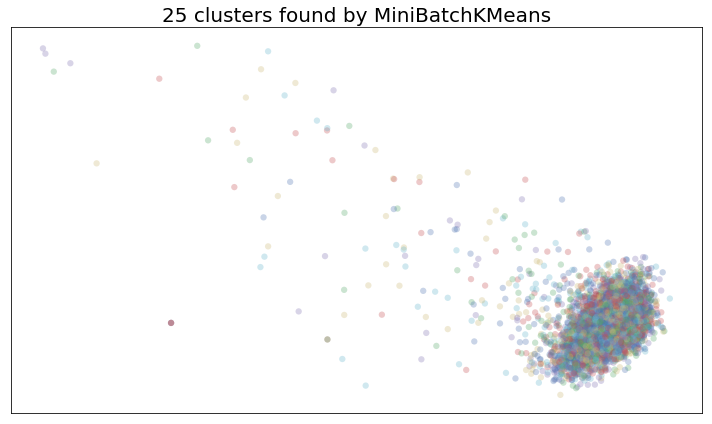

In [31]:
_ = online.viz2D()

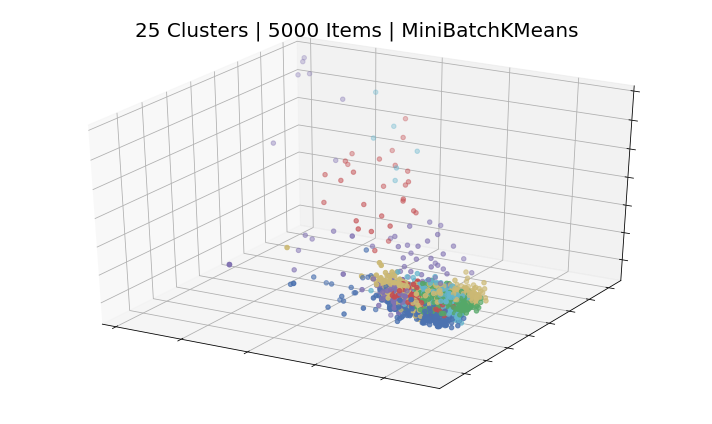

In [32]:
_ = online.viz3D()

In [33]:
online.item_counts()

Cluster 0: 87 items
Cluster 1: 244 items
Cluster 2: 398 items
Cluster 3: 7 items
Cluster 4: 306 items
Cluster 5: 6 items
Cluster 6: 20 items
Cluster 7: 560 items
Cluster 8: 19 items
Cluster 9: 166 items
Cluster 10: 223 items
Cluster 11: 210 items
Cluster 12: 263 items
Cluster 13: 488 items
Cluster 14: 9 items
Cluster 15: 9 items
Cluster 16: 278 items
Cluster 17: 452 items
Cluster 18: 1 items
Cluster 19: 283 items
Cluster 20: 252 items
Cluster 21: 50 items
Cluster 22: 198 items
Cluster 23: 194 items
Cluster 24: 277 items


In [34]:
# Sometimes we get noise clusters if we don't preprocess (we did preprocessing in 
# notebook 02, see use_column='sentences' in StreamData initialization)
online.results[3]

['[being lazy, huh mhm mhm mhm mhm mhm, mhm mhm mhm mhm mhm mhm, mhm mhm mhm mhm mhm, mhm mhm mhm]',
 '[mhm, mhm mhm mhm mhm mhm mhm mhm, mhm mhm]',
 '[mhm mhm mhm mhm mhm mhm mhm mhm mhm mhm, mhm mhm and here i am]',
 '[mhm mhm mhm mhm mhm mhm, mhm mhm mhm mhm mhm mhm mhm mhm mhm mhm, mhm]',
 "[and you know don't you wonder, mhm, mhm mhm mhm mhm mhm mhm, mhm mhm mhm]",
 "[mhm mhm mhm, mhm they're young, mhm mhm mhm]",
 '[mhm mhm mhm mhm mhm mhm, mhm mhm mhm mhm mhm, mhm mhm mhm mhm mhm]']

In [35]:
# Non-trivially sized clusters are generally ok quality
online.results[0]

["[free this is npr, support for npr, comes from npr, stations, includes california working with practices and technology to increase water efficiency minimize waist and more dot com slash water from in phoenix arizona governor proposing twenty percent increase the teachers' pay by the start of the twenty twenty school year many arizona teachers would like to know more about the details of the plane before they commit to supporting the governor's proposal, still doesn't put us at the national average we appreciate the governor has made me feel a little late on us but we're worried about who's not counted are we actually gonna be increases the education funding because it's just not about teachers' salaries we have buses that don't have air conditioning we've classrooms that needs to be prepared that's joshua a teacher and red mountain high school and president education association he and the other teachers saying they have no idea what the funding is coming from and one's shortcuts to

In [36]:
""" This doesn't work well (curse of dimensionality) 
with large number of samples (smaller, like < 1000, is ok).
There is a better way to do this but it's computationally very expensive.
"""

# Get labels, sort text IDs by cluster
labels = online.results['labels']
cluster_idx = {clust_id: np.where(labels == clust_id)[0]
               for clust_id in set(labels)}

# Compute centroids
centroids = np.vstack([online.viz_matrix[indexes].mean(axis=0)
                       for key, indexes in cluster_idx.items()])

# Initialize nearest neighbors
neighbors = NearestNeighbors(10, metric='cosine', algorithm='brute').fit(VECTORS.weights())

# Compute closeness of each term representation to each centroid
order_centroids = neighbors.kneighbors(centroids, return_distance=False)

# Extract cluster terms
cluster_terms = {clust_id: [VECTORS.itos(ind)
                        for ind in order_centroids[idx, :6]]
                        for idx, clust_id in enumerate(cluster_idx.keys())}


print("Top terms per cluster:")
for clust_id, terms in cluster_terms.items():
    words = ' | '.join(terms)
    print("Cluster {0} ({1} items): {2}".format(clust_id,
                                                len(cluster_idx[clust_id]),
                                                words))

Top terms per cluster:
Cluster 0 (87 items): houston | mao | ridicule | sides | oppression | whiskey
Cluster 1 (244 items): houston | ridicule | oppression | mao | sides | misrepresented
Cluster 2 (398 items): ridicule | houston | sides | oppression | whiskey | mao
Cluster 3 (7 items): swath | involuntarily | delicately | squeal | UNK | circular
Cluster 4 (306 items): houston | ridicule | oppression | misrepresented | villain | neighborhood
Cluster 5 (6 items): wayans | knickknacks | broiling | insatiable | snowballs | yeast
Cluster 6 (20 items): sides | UNK | houston | cautions | whiskey | entrance
Cluster 7 (560 items): houston | ridicule | oppression | misrepresented | sides | whiskey
Cluster 8 (19 items): yeast | swath | supplementing | pretext | schenectady | misguided
Cluster 9 (166 items): mao | houston | oppression | ridicule | UNK | sides
Cluster 10 (223 items): entrance | misrepresented | ridicule | whiskey | oppression | plucked
Cluster 11 (210 items): ridicule | houston | w